# Regression

In [ ]:
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt
import torch
import torch.nn as nn
import numpy as np

X, y = make_regression(n_samples=50, n_features=1, noise=1)
X=X*100
plt.scatter(X,y)
plt.show()

x = torch.tensor(X.astype(np.float32))
y=y.reshape(50,-1)
y = torch.tensor(y.astype(np.float32))

x = (x-x.min())/(x.max()-x.min())
y = (y-y.min())/(y.max()-y.min())

In [ ]:
# create data

N = 20
x = torch.randn(N,1)
y = x + torch.randn(N,1)/2

# and plot
plt.plot(x,y,'s')
plt.show()

x = (x-x.min())/(x.max()-x.min())
y = (y-y.min())/(y.max()-y.min())

In [ ]:
model = nn.Sequential(
    nn.Linear(1,1),
    nn.ReLU(),
    nn.Linear(1,1)
)


learningRate = 0.05
lossfunction = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

loss_history = []

for epoch in range(100):
    
    pred = model(x)
    loss = lossfunction(pred, y)
    
    loss_history.append(loss)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [ ]:
testloss = (predictions-y).pow(2).mean()

In [ ]:
plt.plot([x.detach() for x in loss_history], 'o-', markerfacecolor='w', linewidth=1)
plt.plot()

In [ ]:
predictions = model(x)
plt.plot(x, y, 'rx', label="Actual")
plt.plot(x, predictions.detach(), 'bo', label="Predictions")
plt.legend()
plt.show()

# Multilayer ANN

In [ ]:
model = nn.Sequential(
    nn.Linear(1,8),
    nn.ReLU(),
    nn.Linear(8,8),
    nn.Sigmoid(),
    nn.Linear(8,1)
)


learningRate = 0.05
lossfunction = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

loss_history = []

for epoch in range(100):
    
    pred = model(x)
    loss = lossfunction(pred, y)
    
    loss_history.append(loss)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [ ]:
plt.plot([x.detach() for x in loss_history], 'o-', markerfacecolor='w', linewidth=1)
plt.plot()

In [ ]:
predictions = model(x)
plt.plot(x, y, 'rx', label="Actual")
plt.plot(x, predictions.detach(), 'bo', label="Predictions")
plt.legend()
plt.show()

# IRIS

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['class'] = iris.target
x = df.drop(labels='class', axis=1).astype(np.float32).values
y = df['class'].astype(np.float32).values

In [ ]:
import torch, torch.nn as nn

In [ ]:
data = torch.tensor( x ).float()
labels = torch.tensor( y ).long()
print (data.size())
print (labels.size())

In [ ]:
model = nn.Sequential(
    nn.Linear(4,16),   # input layer
    nn.ReLU(),         # activation
    nn.Linear(16,16),  # hidden layer
    nn.ReLU(),         # activation
    nn.Linear(16,3),   # output layer
      )

crossentropyloss = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(),lr=.01)

In [ ]:
maxiter = 1000

losses = []
accuracy = []

for epochi in range(maxiter):
    preds = model(data)
    loss = crossentropyloss(preds,labels)
    losses.append(loss.detach())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    matches = (torch.argmax(preds,axis=1) == labels).float()
    accuracyPct = 100*torch.mean(matches)
    accuracy.append( accuracyPct )             

In [ ]:
import matplotlib.pyplot as plt 

fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses)
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(accuracy)
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')
plt.show()


## Visualizing Decision Boundary

In [ ]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import torch, torch.nn as nn
from matplotlib.colors import ListedColormap  

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['class'] = iris.target
x = df.drop(labels='class', axis=1).astype(np.float32).values
y = df['class'].astype(np.float32).values

data = torch.tensor( x[:,1:3] ).float()
labels = torch.tensor( y ).long()

model = nn.Sequential(
    nn.Linear(2,128),   # input layer
    nn.ReLU(),         # activation
    nn.Linear(128,128),  # hidden layer
    nn.Sigmoid(),         # activation
    nn.Linear(128,3),   # output layer
)

crossentropyloss = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(),lr=.01)

maxiter = 1000

losses = []
accuracy = []

for epochi in range(maxiter):
    preds = model(data)
    loss = crossentropyloss(preds,labels)
    losses.append(loss.detach())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    matches = (torch.argmax(preds,axis=1) == labels).float()
    accuracyPct = 100*torch.mean(matches)
    accuracy.append( accuracyPct )             

In [ ]:
predictions = model(data)
predlabels = torch.argmax(predictions,axis=1)
final_accuracy = 100*torch.mean((predlabels == labels).float())

In [ ]:
x1_min, x1_max = x[:, 1].min() - 1, x[:, 1].max() + 1
x2_min, x2_max = x[:, 2].min() - 1, x[:, 2].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))

In [ ]:
predictions = model(torch.tensor(np.array([xx1.ravel(), xx2.ravel()]).astype(np.float32)).T)
predlabels = torch.argmax(predictions,axis=1)

markers = ('s', 'x', 'o', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y))])

Z = predlabels.T
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

for idx, cl in enumerate(np.unique(y)): 
    plt.scatter(x=x[y == cl, 1],  y=x[y == cl, 2], c=colors[idx], marker=markers[idx], alpha=0.5, label=cl,  edgecolor='black')


# Class NN

In [4]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

X, y = make_classification(n_samples = 100, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_classes=2, random_state=15)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')

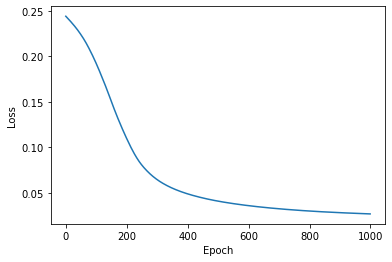

In [10]:
import torch, torch.nn as nn, torch.nn.functional as F
import numpy as np

class MyNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.input = nn.Linear(2,8)
    self.hidden = nn.Linear(8,8)
    self.output = nn.Linear(8,1)

  def forward(self,x):
    x = self.input(x)
    x = F.relu( x )
    x = self.hidden(x)
    x = F.relu(x)
    x = self.output(x)
    x = torch.sigmoid(x)
    return x

mymodel = MyNetwork()

data = torch.tensor(X.astype(np.float32))
labels = torch.tensor(y.reshape(1,100).T.astype(np.float32))
learningRate = .05

lossfun = nn.MSELoss()
optimizer = torch.optim.SGD(mymodel.parameters(),lr=learningRate)

numepochs = 1000
losses = torch.zeros(numepochs)

for epochi in range(numepochs):
  yHat = mymodel(data)
  loss = lossfun(yHat,labels)
  losses[epochi] = loss
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

# show the losses
plt.plot(losses.detach())
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()    

# Dropout

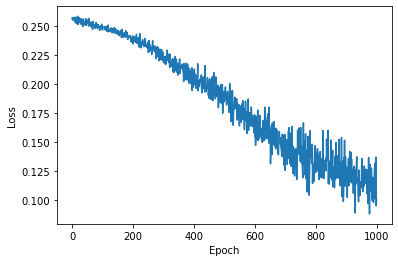

In [13]:
import torch, torch.nn as nn, torch.nn.functional as F
import numpy as np

class MyNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.input = nn.Linear(2,8)
    self.hidden = nn.Linear(8,8)
    self.output = nn.Linear(8,1)
    

  def forward(self,x):
    x = self.input(x)
    x = F.relu( x )
    x = F.dropout(x,p=0.2)
    x = self.hidden(x)
    x = F.relu(x)
    x = F.dropout(x,p=0.2)
    x = self.output(x)
    x = torch.sigmoid(x)
    return x

mymodel = MyNetwork()

data = torch.tensor(X.astype(np.float32))
labels = torch.tensor(y.reshape(1,100).T.astype(np.float32))
learningRate = .05

lossfun = nn.MSELoss()
optimizer = torch.optim.SGD(mymodel.parameters(),lr=learningRate)

numepochs = 1000
losses = torch.zeros(numepochs)

for epochi in range(numepochs):
  yHat = mymodel(data)
  loss = lossfun(yHat,labels)
  losses[epochi] = loss
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

# show the losses
plt.plot(losses.detach())
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()    

# MNIST CLASSIFICATION

In [14]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [22]:
transform = transforms.Compose([transforms.ToTensor()])

In [27]:
trainset = datasets.MNIST('train', download=True, train=True, transform=transform)
testset = datasets.MNIST('test', download=True, train=False, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [28]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [30]:
trainloader

In [55]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

In [40]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

In [38]:
images[0,0,4:6,10:15]

tensor([[0.0000, 0.1059, 0.6392, 0.9725, 0.7882],
        [0.3216, 0.9373, 0.9961, 0.8275, 0.8863]])

In [50]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [108]:
model = nn.Sequential(nn.Linear(784, 64),
                      nn.ReLU(),
                      nn.Linear(64,64),
                      nn.ReLU(),
                      nn.Linear(64,10),
)
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
)


In [109]:
lossfn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=.01)

In [110]:
losses = []
for epoch in range(10):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        output = model(images)
        loss = lossfn(output, labels)
        loss.backward()
        optimizer.step()        
        running_loss += loss.item()
    print("Epoch {} - Training loss: {}".format(epoch, running_loss/len(trainloader)))
    losses.append(running_loss/len(trainloader))


Epoch 0 - Training loss: 1.7003767946635737
Epoch 1 - Training loss: 0.5622020193190971
Epoch 2 - Training loss: 0.4039541946005211
Epoch 3 - Training loss: 0.35494661225534196
Epoch 4 - Training loss: 0.32477016467402486
Epoch 5 - Training loss: 0.302617403871215
Epoch 6 - Training loss: 0.2849765776086654
Epoch 7 - Training loss: 0.2697247594261347
Epoch 8 - Training loss: 0.25579357369622185
Epoch 9 - Training loss: 0.24312975907773732


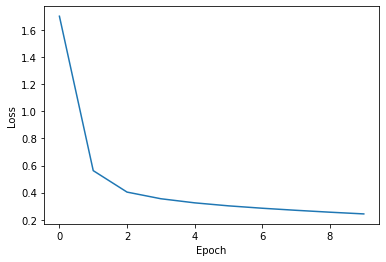

In [111]:
# show the losses
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()    

In [112]:
testimgs, testlabels = iter(testloader).next()

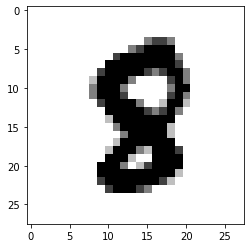

In [113]:
plt.imshow(testimgs[0][0].numpy().squeeze(), cmap='gray_r');

In [117]:
img = testimgs[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

In [125]:
ps = torch.exp(logps)
probabilities = list(ps.numpy()[0])
prediction = probabilities.index(max(probabilities))
prediction
# true_label = labels.numpy()[i]

8

8